<a href="https://colab.research.google.com/github/user1896/Neural-Network-image-classification/blob/main/VGG-16/VGG_16_Load_and_test_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load VGG-16

In [20]:
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

# Load DataSet

In [21]:
# load train and test dataset
def load_dataset():
  # load dataset
  (trainX, trainY), (testX, testY) = cifar10.load_data()
  # one hot encode target values
  trainY = to_categorical(trainY)
  testY = to_categorical(testY)
  return trainX, trainY, testX, testY

# Prepare Pixel Data

In [22]:
def prep_pixels(train, test):
  # convert from integers to floats
  train_norm = train.astype( 'float32' )
  test_norm = test.astype( 'float32' )
  # normalize to range 0-1
  train_norm = train_norm / 255.0
  test_norm = test_norm / 255.0
  # return normalized images
  return train_norm, test_norm

In [23]:
# load dataset
trainX, trainY, testX, testY = load_dataset()
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)

# Load the model

In [35]:
# Load the model
from tensorflow import keras
reconstructed_model = keras.models.load_model("/content/drive/MyDrive/cnn models/VggGC.h5")

In [25]:
# evaluate model
_ , acc = reconstructed_model.evaluate(testX, testY, verbose=0)
print( ' > %.3f ' % (acc * 100.0))

 > 90.610 


# Confusion Matrix

In [26]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize=True'.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i,j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

In [27]:
rounded_labels=np.argmax(testY, axis=1)

p_test = reconstructed_model.predict(testX).argmax(axis=1)
cm = confusion_matrix(rounded_labels, p_test)

313/313 [==============================] - 159s 507ms/step


Confusion matrix, without normalization
[[897   8  21  16   3   0   9   5  30  11]
 [  2 980   1   3   0   0   1   0   4   9]
 [ 18   0 875  29  19  27  20   7   3   2]
 [  8   1  21 834  12  75  27   7   5  10]
 [  2   1  20  33 905  12  19   7   1   0]
 [  4   2  19  92  19 849  11   4   0   0]
 [  5   1  14  22   1   2 953   1   1   0]
 [  5   0   6  19  25  27   3 912   0   3]
 [ 23  12   8   5   1   0   8   1 933   9]
 [  5  57   3   2   2   1   1   1   5 923]]


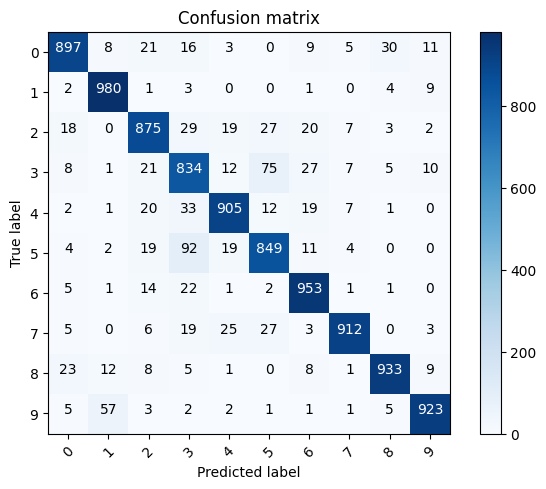

In [28]:
plot_confusion_matrix(cm, list(range(10)))

# Test The Model

In [29]:
# Label mapping
labels = '''Airplane
Car
Bird
Cat
Deer
Dog
Frog
Horse
Boat
Truck'''.split()

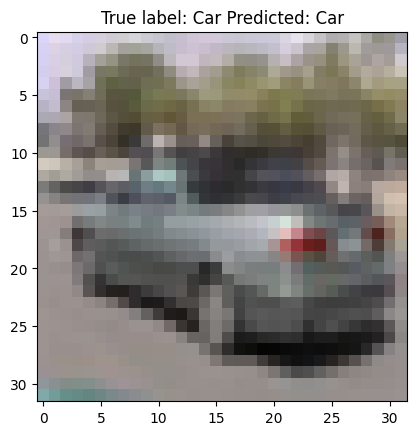

In [34]:
# Show some classified examples
classified_idx = np.where(p_test == rounded_labels)[0]
i = np.random.choice(classified_idx)
plt.imshow(testX[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[rounded_labels[i]], labels[p_test[i]]));